In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Bad key "“backend" on line 1 in
/Users/bhkash/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
problem = "continous-peaks"

In [18]:

def plot_fitness_old(df):
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    ax = df_fitness.plot()
    ax.set_ylabel("Fitness")
    plt.grid()
    
def plot_fitness(df, df_names={}, title=""):      
    
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    
    for name, label in df_names.items():
        plt.plot(df_fitness.index, df_fitness["fitness_" + name], label=label)
    
    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel("Iterations")
    plt.ylabel("Fitness") 
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_evals(df):
    eval_col = [col for col in df if col.startswith('fevals')]
    df_feval = df[eval_col]
    ax = df_feval.plot(logy =True)
    ax.xlabel("Iterations")    
    ax.set_ylabel("Function Evaluations")
    plt.grid()
    
    

def plot_fitness_eval(df):
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    ax = df_fitness.plot()
    ax.set_ylabel("Fitness")
    plt.grid()
    eval_col = [col for col in df if col.startswith('fevals')]
    df_feval = df[eval_col]
    ax = df_feval.plot(logy =True)
    ax.set_ylabel("Fevals")
    plt.grid()
    
def combine_charts(problem, option = ""):
    algos = ["RHC", "SA", "GA", "MIMIC"]
    
    file = problem + str(option)
    df_read = pd.read_csv("ABAGAIL/jython/data/" +problem+ "/"+ "RHC" +"-" + file+".csv")
    df= pd.DataFrame(index = df_read["iters"])
    
    for algo in algos:
        
        df_read = pd.read_csv("ABAGAIL/jython/data/"+problem+ "/" + algo +"-" + file+".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + algo)
        
        df = df.join(df_read)
    
    df.ffill(inplace= True)
    return df

def combineFiles(filenames={}, problem="continous-peaks"):
    
    filename1= list(filenames.keys())[0]
    
    df_read = pd.read_csv("ABAGAIL/jython/data/" + problem + "/"+ filename1 +".csv")
    df = pd.DataFrame(index = df_read["iters"])
    
    for name in filenames.keys():
        df_read = pd.read_csv("ABAGAIL/jython/data/"+ problem + "/" + name +".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + name)

        df = df.join(df_read)
        
    df.ffill(inplace= True)
    return df

def plot_time(df, name_dict, heading ="Bar chart", x_axis_label = "Algorithm"):
    x_labels, y_value = [], []
    df_max_time_fitness = pd.DataFrame(columns = [x_axis_label, "Max Fitness", "Time to Convergence", "Function Evals"])
    for name, label in name_dict.items():
        fittest_row = df.iloc[df["fitness_" + name].argmax()]
        max_time = fittest_row["time_" + name]
        max_fitness = fittest_row["fitness_" + name]
        max_fevals = fittest_row["fevals_" + name]
        df_max_time_fitness = df_max_time_fitness.append({x_axis_label:label, "Max Fitness" : max_fitness, "Time to Convergence":max_time
                                                         ,"Function Evals": max_fevals}, ignore_index = True)
        x_labels.append(label)
        y_value.append(max_time)
    bars = plt.bar(x_labels, y_value)
    
    plt.title(heading)
    plt.ylabel("Time")
    plt.xlabel(x_axis_label)
    plt.grid()
    plt.show()
    return df_max_time_fitness
    

In [150]:
df

,fevals_expt_final-RHC-tuned,fitness_expt_final-RHC-tuned,time_expt_final-RHC-tuned,fevals_expt_final-SA-tuned,fitness_expt_final-SA-tuned,time_expt_final-SA-tuned,fevals_expt_final-GA-tuned,fitness_expt_final-GA-tuned,time_expt_final-GA-tuned,fevals_expt_final-MIMIC-tuned,fitness_expt_final-MIMIC-tuned,time_expt_final-MIMIC-tuned
iters,,,,,,,,,,,,
0,3,158.0,0.013,2,156.0,0.002,513.0,164.0,0.008,1000.0,169.0,0.077
1,5,158.0,0.014,4,156.0,0.002,1549.0,167.0,0.013,2000.0,177.0,0.120
2,7,158.0,0.015,6,156.0,0.002,13596.0,162.0,0.056,2600.0,174.0,0.139
3,9,158.0,0.015,8,156.0,0.002,15206.0,165.0,0.061,3200.0,174.0,0.159
4,11,158.0,0.015,10,156.0,0.002,16527.0,162.0,0.062,3800.0,172.0,0.176
5,13,158.0,0.015,12,156.0,0.002,19458.0,162.0,0.066,4400.0,172.0,0.194
6,15,158.0,0.015,14,156.0,0.002,20441.0,162.0,0.068,5000.0,174.0,0.212
7,17,158.0,0.015,16,156.0,0.002,21592.0,163.0,0.069,5600.0,172.0,0.230
8,19,158.0,0.016,18,156.0,0.002,23253.0,165.0,0.071,6200.0,172.0,0.248


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


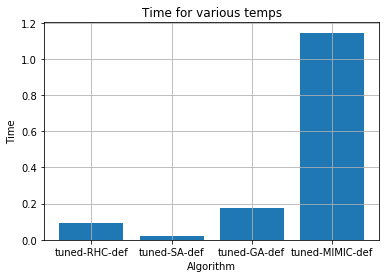

,Algorithm,Max Fitness,Time to Convergence
0,tuned-RHC-def,96.0,0.093
1,tuned-SA-def,98.0,0.020
2,tuned-GA-def,98.0,0.178
3,tuned-MIMIC-def,98.0,1.145


In [123]:
# df = combine_charts("continous-peaks")
plot_time(df, mapping, "Time for various temps")

# RHC

{'expt_Restarts-RHC-round=0': 'round=0', 'expt_Restarts-RHC-round=1': 'round=1', 'expt_Restarts-RHC-round=2': 'round=2', 'expt_Restarts-RHC-round=3': 'round=3', 'expt_Restarts-RHC-round=4': 'round=4'}


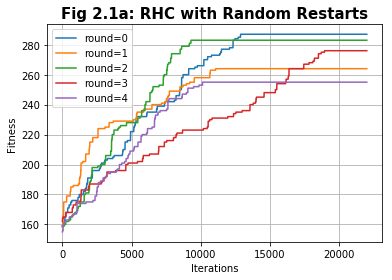

In [67]:
expt = "expt_Restarts"

mapping = makeMapping(expt, "RHC", "round", [i for i in range(5)])

print(mapping)

df = combineFiles(mapping)


plot_fitness(df[:22000], mapping, title="Fig 2.1a: RHC with 5 Random Restarts")

# SA

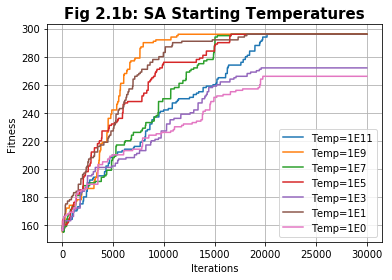

In [68]:
# Temp tuning. seed 54815

mapping = {
    "expt_Temp-SA-Temp=1E11_Decay=0.95"  : "Temp=1E11",
    "expt_Temp-SA-Temp=1E9_Decay=0.95"   : "Temp=1E9",
    "expt_Temp-SA-Temp=1E7_Decay=0.95"   : "Temp=1E7",
    "expt_Temp-SA-Temp=1E5_Decay=0.95"   : "Temp=1E5",
    "expt_Temp-SA-Temp=1E3_Decay=0.95"   : "Temp=1E3",
    "expt_Temp-SA-Temp=1E1_Decay=0.95"   : "Temp=1E1",
    "expt_Temp-SA-Temp=1E0_Decay=0.95"   : "Temp=1E0",
}

df = combineFiles(mapping)


plot_fitness(df[:30000], mapping, title="Fig 2.1b: SA Starting Temperatures")

In [80]:
mapping = {
    "expt_Temp-SA-Temp=1E11_Decay=0.95"  : "1E11",
    "expt_Temp-SA-Temp=1E9_Decay=0.95"   : "1E9",
    "expt_Temp-SA-Temp=1E7_Decay=0.95"   : "1E7",
    "expt_Temp-SA-Temp=1E5_Decay=0.95"   : "1E5",
    "expt_Temp-SA-Temp=1E3_Decay=0.95"   : "1E3",
    "expt_Temp-SA-Temp=1E1_Decay=0.95"   : "1E1",
    "expt_Temp-SA-Temp=1E0_Decay=0.95"   : "1E0",
}

1E11 0.2460000514984131
1E9 0.10299992561340332
1E7 0.06999993324279785
1E5 0.0840001106262207
1E3 0.08599996566772461
1E1 0.07500004768371582
1E0 0.0710000991821289


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


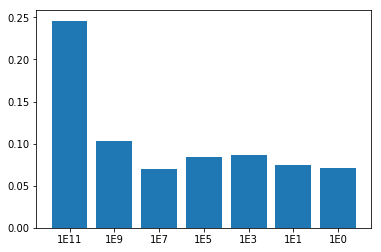

In [81]:
plot_time(df, mapping, "Time for various temps")

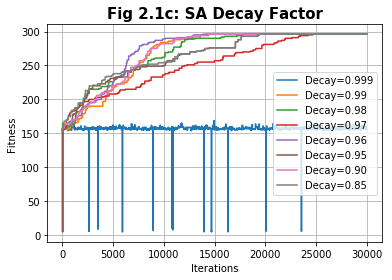

In [69]:
# Decay tuning

mapping = {
    "expt_Decay-SA-Temp=1E5_Decay=0.9999"  : "Decay=0.999",
    "expt_Decay-SA-Temp=1E5_Decay=0.99"   : "Decay=0.99",
    "expt_Decay-SA-Temp=1E5_Decay=0.98"   : "Decay=0.98",
    "expt_Decay-SA-Temp=1E5_Decay=0.97"   : "Decay=0.97",
    "expt_Decay-SA-Temp=1E5_Decay=0.96"   : "Decay=0.96",
    "expt_Decay-SA-Temp=1E5_Decay=0.95"   : "Decay=0.95",
    "expt_Decay-SA-Temp=1E5_Decay=0.90"   : "Decay=0.90",
    "expt_Decay-SA-Temp=1E5_Decay=0.85"   : "Decay=0.85",
}

df = combineFiles(mapping)


plot_fitness(df[:50000], mapping, title="Fig 2.1c: SA Decay Factor")

# GA

In [14]:
def makeMapping(expt, algo, param_name, param_values):
    mapping = {}
    for param in param_values:
        mapping[expt+ "-" + algo + "-" + param_name + "=" + str(param)] = param_name + "=" + str(param)
    return mapping

{'expt_GA_pop_mate_size=50_mutation=10-GA-Pop=100': 'Pop=100', 'expt_GA_pop_mate_size=50_mutation=10-GA-Pop=125': 'Pop=125', 'expt_GA_pop_mate_size=50_mutation=10-GA-Pop=200': 'Pop=200', 'expt_GA_pop_mate_size=50_mutation=10-GA-Pop=250': 'Pop=250', 'expt_GA_pop_mate_size=50_mutation=10-GA-Pop=300': 'Pop=300', 'expt_GA_pop_mate_size=50_mutation=10-GA-Pop=350': 'Pop=350'}


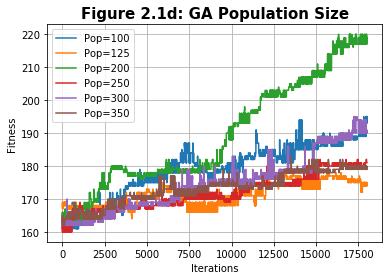

In [70]:
#Report
mate_size = 50
mutation = 10
expt = "expt_GA_pop" + "_mate_size="+ str(mate_size) + "_mutation=" + str(mutation)

mapping = makeMapping(expt, "GA", "Pop", [100,125,200,250,300, 350])

print(mapping)

df = combineFiles(mapping)


plot_fitness(df[:18000], mapping, title="Figure 2.1d: GA Population Size")

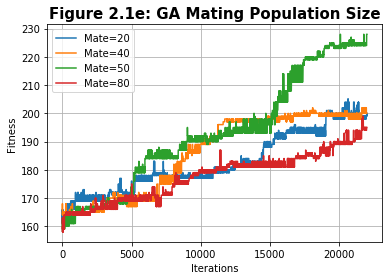

In [72]:
pop_size = 200
mutation = 10
expt = "expt_GA_mate" + "_pop_size="+ str(pop_size) + "_mutation=" + str(mutation)
mapping = makeMapping(expt, "GA", "Mate", [20,40,50, 80])

df = combineFiles(mapping)


plot_fitness(df[:22000], mapping, title="Figure 2.1e: GA Mating Population Size")

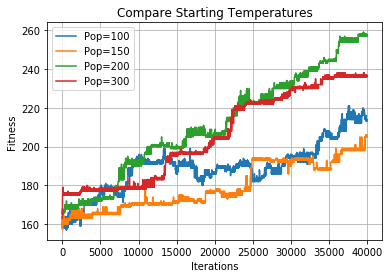

In [56]:
# Pop size tuning

mapping = {
    "expt_GA_pop-GA-Pop=100"  : "Pop=100",
    "expt_GA_pop-GA-Pop=150"  : "Pop=150",
    "expt_GA_pop-GA-Pop=200"  : "Pop=200",
    "expt_GA_pop-GA-Pop=300"  : "Pop=300",
}

df = combineFiles("continous-peaks", mapping)


plot_fitness(df[:40000], mapping, title="Compare Starting Temperatures")

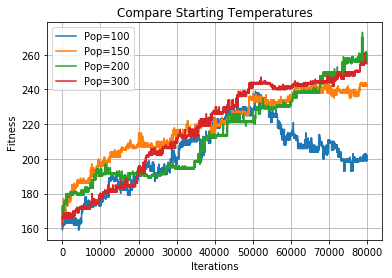

In [130]:
# Pop size tuning

mapping = {
    "expt_GA_pop-GA-Pop=100"  : "Pop=100",
    "expt_GA_pop-GA-Pop=150"  : "Pop=150",
    "expt_GA_pop-GA-Pop=200"  : "Pop=200",
    "expt_GA_pop-GA-Pop=300"  : "Pop=300",
}

df = combineFiles("continous-peaks", mapping)


plot_fitness(df, mapping, title="Compare Starting Temperatures")

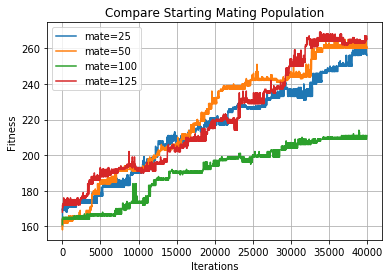

In [160]:
# mate size tuning, pop 200

mapping = {
    "expt_GA_mate-GA-mate=25"  : "mate=25",
    "expt_GA_mate-GA-mate=50"  : "mate=50",
    "expt_GA_mate-GA-mate=100"  : "mate=100",
    "expt_GA_mate-GA-mate=125"  : "mate=125",
}

df = combineFiles("continous-peaks", mapping)


plot_fitness(df[:40000], mapping, title="Compare Starting Mating Population")

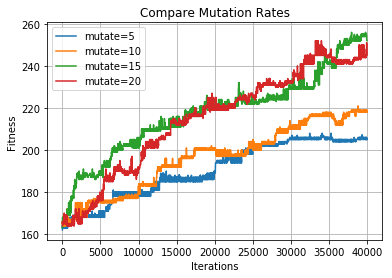

In [125]:
# mutate size tuning, pop 200,  mate = 50, select 

mapping = {
    "expt_GA_mutate-GA-mutate=5"  : "mutate=5",
    "expt_GA_mutate-GA-mutate=10"  : "mutate=10",
    "expt_GA_mutate-GA-mutate=15"  : "mutate=15",
    "expt_GA_mutate-GA-mutate=20"  : "mutate=20",
}

df = combineFiles("continous-peaks", mapping)


plot_fitness(df[:40000], mapping, title="Compare Mutation Rates")

# MIMIC

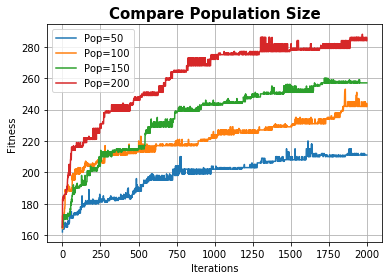

In [53]:
# Pop size tuning, select 200

mapping = {
    "expt_MIMIC_pop-MIMIC-Pop=50"  : "Pop=50",
    "expt_MIMIC_pop-MIMIC-Pop=100"  : "Pop=100",
    "expt_MIMIC_pop-MIMIC-Pop=150"  : "Pop=150",
    "expt_MIMIC_pop-MIMIC-Pop=200"  : "Pop=200",
}

df = combineFiles(mapping)


plot_fitness(df[:40000], mapping, title="Compare Population Size")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


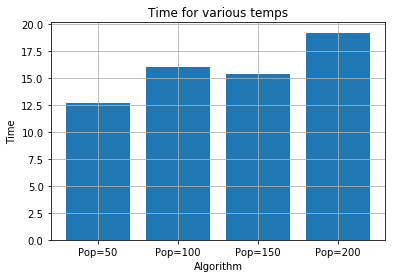

,Algorithm,Max Fitness,Time to Convergence
0,Pop=50,220.0,12.683
1,Pop=100,253.0,16.004
2,Pop=150,260.0,15.376
3,Pop=200,288.0,19.168


In [127]:
plot_time(df, mapping, "Time for various temps")

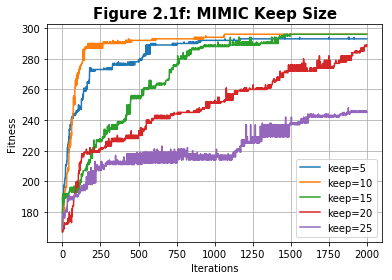

In [73]:
# Keep size tuning, keep 5 

mapping = {
    "expt_MIMIC_keep-MIMIC-keep=5"  : "keep=5",
    "expt_MIMIC_keep-MIMIC-keep=10"  : "keep=10",
    "expt_MIMIC_keep-MIMIC-keep=15"  : "keep=15",
    "expt_MIMIC_keep-MIMIC-keep=20"  : "keep=20",
    "expt_MIMIC_keep-MIMIC-keep=25"  : "keep=25",
}

df = combineFiles( mapping)


plot_fitness(df[:40000], mapping, title="Figure 2.1: MIMIC Keep Size")

# Problem Size

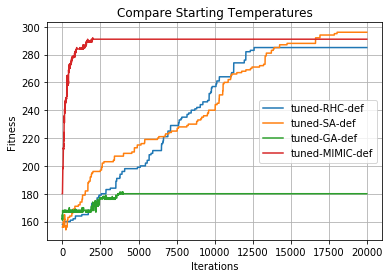

In [133]:
#N = 150, T = N/50
#Distribution.random.setSeed(54815)
#ABAGAILArrays.random.setSeed(1000)

mapping = {
    "expt_tuned-RHC-tuned"  : "tuned-RHC-def",
    "expt_tuned-SA-tuned"  : "tuned-SA-def",
    "expt_tuned-GA-tuned"  : "tuned-GA-def",
    "expt_tuned-MIMIC-tuned"  : "tuned-MIMIC-def",
}

df = combineFiles("continous-peaks", mapping)


plot_fitness(df[:20000], mapping, title="Compare Starting Temperatures")

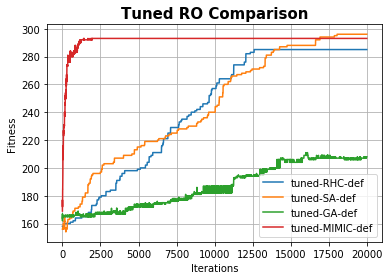

In [47]:
#N = 150, T = N/50
#Report
#Distribution.random.setSeed(54815)
#ABAGAILArrays.random.setSeed(1000)

mapping = {
    "expt_final-RHC-tuned"  : "tuned-RHC-def",
    "expt_final-SA-tuned"  : "tuned-SA-def",
    "expt_final-GA-tuned"  : "tuned-GA-def",
    "expt_final-MIMIC-tuned"  : "tuned-MIMIC-def",
}

df = combineFiles(mapping)


plot_fitness(df[:20000], mapping, title="Tuned RO Comparison")

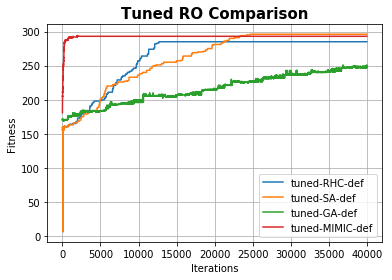

In [37]:
#N = 150, T = N/50
#Distribution.random.setSeed(54815)
#ABAGAILArrays.random.setSeed(1000)

mapping = {
    "expt_final_2-RHC-tuned"  : "tuned-RHC-def",
    "expt_final_2-SA-tuned"  : "tuned-SA-def",
    "expt_final_2-GA-tuned"  : "tuned-GA-def",
    "expt_final_2-MIMIC-tuned"  : "tuned-MIMIC-def",
}

df = combineFiles(mapping)


plot_fitness(df[:40000], mapping, title="Tuned RO Comparison")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


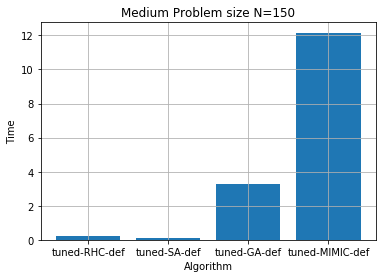

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,tuned-RHC-def,285.0,0.210,12844.0
1,tuned-SA-def,296.0,0.118,18301.0
2,tuned-GA-def,228.0,3.257,2203009.0
3,tuned-MIMIC-def,293.0,12.159,610400.0


In [155]:
plot_time(df, mapping, "Medium Problem size N=150")

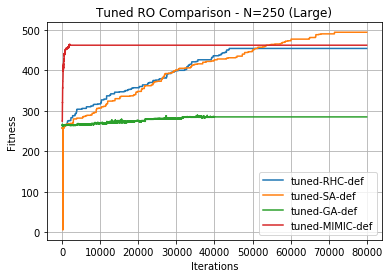

In [156]:
#N = 250, T = N/50
mapping = {
    "expt_tuned_big_final-RHC-tuned"  : "tuned-RHC-def",
    "expt_tuned_big_final-SA-tuned"  : "tuned-SA-def",
    "expt_tuned_big_final-GA-tuned"  : "tuned-GA-def",
    "expt_tuned_big_final-MIMIC-tuned"  : "tuned-MIMIC-def",
}

df = combineFiles("continous-peaks", mapping)


plot_fitness(df[:80000], mapping, title="Tuned RO Comparison - N=250 (Large)")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


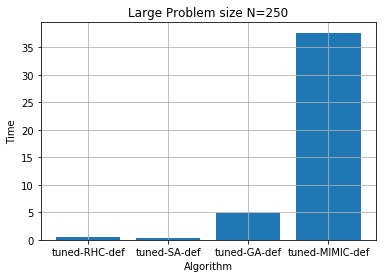

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,tuned-RHC-def,454.0,0.551,44112.0
1,tuned-SA-def,494.0,0.385,71775.0
2,tuned-GA-def,290.0,4.825,2063780.0
3,tuned-MIMIC-def,464.0,37.625,793400.0


In [157]:
plot_time(df, mapping, "Large Problem size N=250")

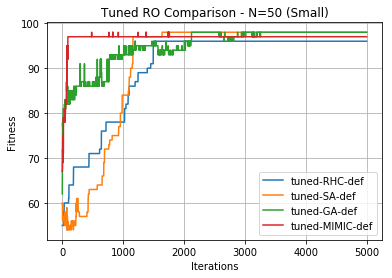

In [158]:
#N = 50, T = N/50
mapping = {
    "expt_tuned_small-RHC-tuned"  : "tuned-RHC-def",
    "expt_tuned_small-SA-tuned"  : "tuned-SA-def",
    "expt_tuned_small-GA-tuned"  : "tuned-GA-def",
    "expt_tuned_small-MIMIC-tuned"  : "tuned-MIMIC-def",
}

df = combineFiles("continous-peaks", mapping)


plot_fitness(df[:5000], mapping, title="Tuned RO Comparison - N=50 (Small)")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


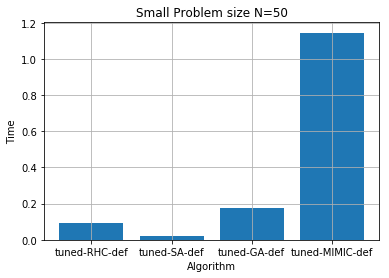

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,tuned-RHC-def,96.0,0.093,1746.0
1,tuned-SA-def,98.0,0.020,1902.0
2,tuned-GA-def,98.0,0.178,159215.0
3,tuned-MIMIC-def,98.0,1.145,244200.0


In [159]:
plot_time(df, mapping, "Small Problem size N=50")

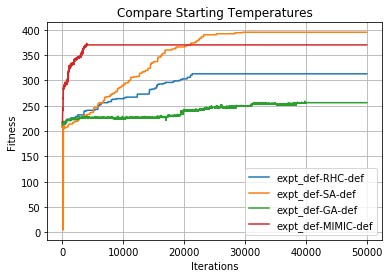

In [42]:
#N = 250, T = N/50
mapping = {
    "expt_def-RHC-def"  : "expt_def-RHC-def",
    "expt_def-SA-def"  : "expt_def-SA-def",
    "expt_def-GA-def"  : "expt_def-GA-def",
    "expt_def-MIMIC-def"  : "expt_def-MIMIC-def",
}

df = combineFiles("continous-peaks", mapping)


plot_fitness(df[:20000], mapping, title="Compare Starting Temperatures")

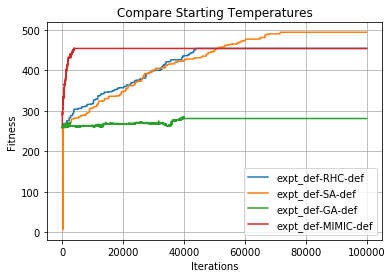

In [46]:
mapping = {
    "expt_def-RHC-def"  : "expt_def-RHC-def",
    "expt_def-SA-def"  : "expt_def-SA-def",
    "expt_def-GA-def"  : "expt_def-GA-def",
    "expt_def-MIMIC-def"  : "expt_def-MIMIC-def",
}

df = combineFiles("continous-peaks", mapping)


plot_fitness(df[:100000], mapping, title="Compare Starting Temperatures")

In [16]:
plot_fitness(df[:5000])

NameError: name 'df' is not defined

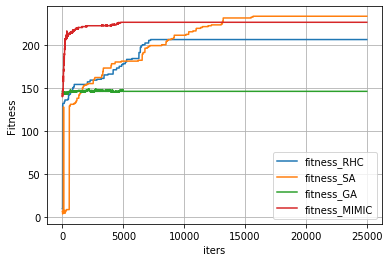

In [177]:
df_cp = combine_charts("continous-peaks")
plot_fitness(df_cp[:25000])

In [25]:
cont_peaks_20 = combine_charts("continous-peaks", 20)
cont_peaks_50 = combine_charts("continous-peaks", 50)
cont_peaks_150 = combine_charts("continous-peaks", 150)

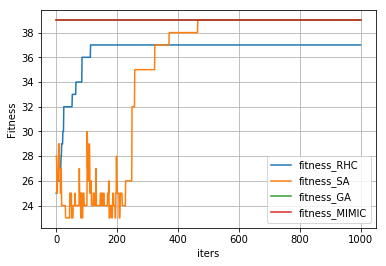

In [19]:
plot_fitness(cont_peaks_20[:1000])

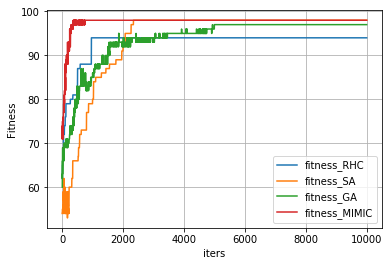

In [22]:
plot_fitness(cont_peaks_50[:10000])

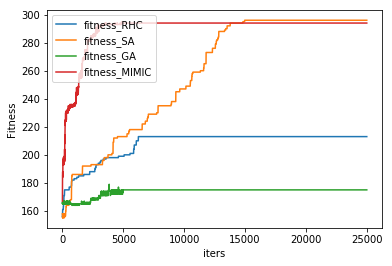

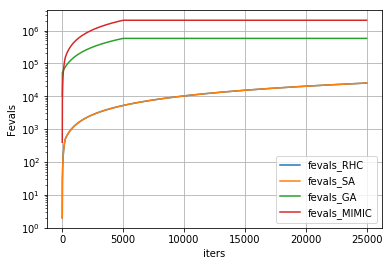

In [31]:
plot_fitness_eval(cont_peaks_150[:25000])

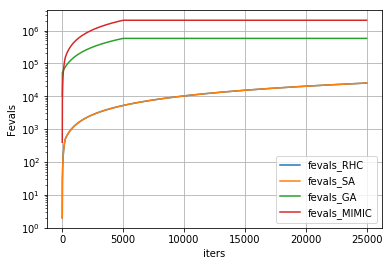

In [29]:
plot_evals(cont_peaks_150[:25000])

In [7]:
df_knp = combine_charts("knapsack")
df_knp

,fevals_RHC,fitness_RHC,fevals_SA,fitness_SA,fevals_GA,fitness_GA,fevals_MIMIC,fitness_MIMIC
iters,,,,,,,,
0,2,2024.660861,2,1857.398299,77879.0,3542.326197,6200.0,3636.362575
1,5,2049.533789,4,1836.803801,78037.0,3536.869254,7800.0,3641.325536
2,7,2049.533789,6,1900.302344,78195.0,3556.469103,8400.0,3637.138514
3,9,2092.511945,9,1984.453690,78353.0,3536.816364,9000.0,3637.138514
4,11,2092.511945,14,2135.241839,78508.0,3581.791126,9600.0,3649.168882
5,13,2092.511945,16,2135.241839,78663.0,3575.763995,10200.0,3618.756416
6,15,2133.073716,25,2338.480026,78818.0,3568.591408,10800.0,3615.582755
7,17,2133.073716,29,2377.240360,78972.0,3571.407600,11400.0,3633.964853
8,19,2133.073716,32,2385.348792,79125.0,3590.407352,12000.0,3615.582755


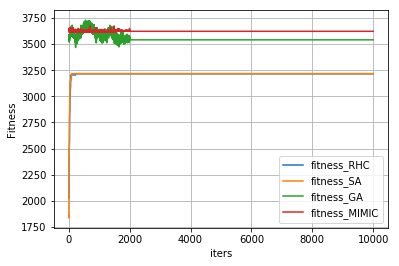

In [11]:
plot_fitness(df_knp[:10000])

In [4]:
df_tsp = combine_charts("tsp")
df_tsp

,fevals_RHC,fitness_RHC,fevals_SA,fitness_SA,fevals_GA,fitness_GA,fevals_MIMIC,fitness_MIMIC
iters,,,,,,,,
0,6,0.041078,16,0.037502,779262.0,0.160270,0.0,0.102067
1,8,0.041105,41,0.038310,780821.0,0.160270,-1.0,0.103069
2,16,0.043215,69,0.043583,782394.0,0.160270,-2.0,0.103843
3,18,0.043215,107,0.040098,783963.0,0.160270,-3.0,0.103693
4,20,0.043215,123,0.040486,785528.0,0.160270,-4.0,0.106664
5,22,0.045312,134,0.037126,787096.0,0.162762,-5.0,0.103518
6,24,0.046662,153,0.038084,788654.0,0.164020,-6.0,0.105388
7,26,0.046662,278,0.037713,790206.0,0.164020,-7.0,0.103388
8,28,0.046662,322,0.041438,791759.0,0.164020,-8.0,0.103092


In [38]:
tsp_10 = combine_charts("tsp", 10)
tsp_25 = combine_charts("tsp", 25)
tsp_50 = combine_charts("tsp", 50)

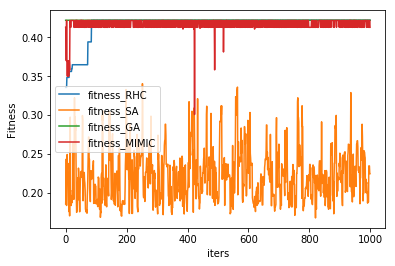

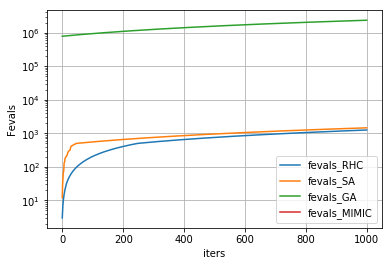

In [37]:
plot_fitness_eval(tsp_10[:1000])

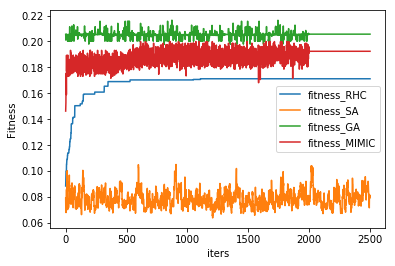

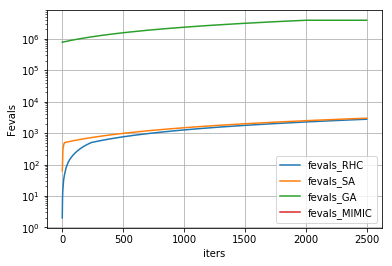

In [36]:
plot_fitness_eval(tsp_25[:2500])

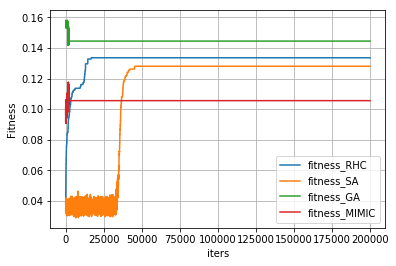

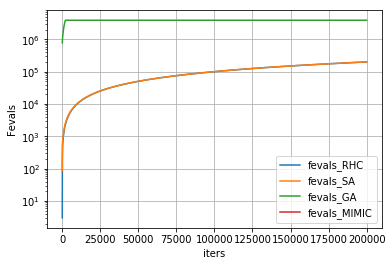

In [57]:
plot_fitness_eval(tsp_50)

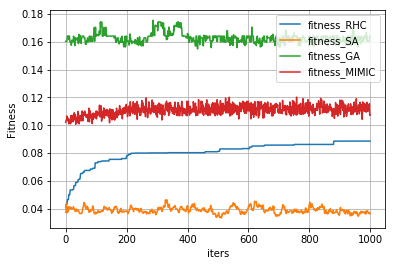

In [24]:
plot_fitness_eval(df_tsp_50[:1000])

In [54]:
knp_10 = combine_charts("knapsack", 10)
knp_25 = combine_charts("knapsack", 25)
knp_50 = combine_charts("knapsack", 50)
knp_75 = combine_charts("knapsack", 75)

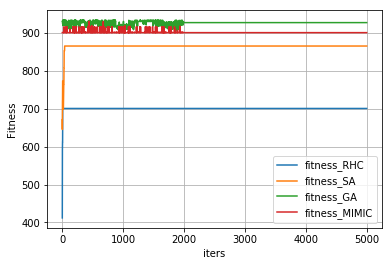

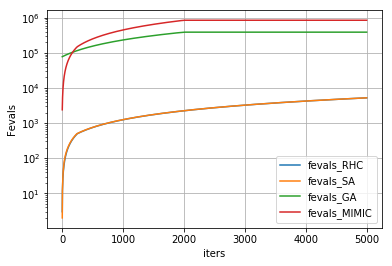

In [52]:
plot_fitness_eval(knp_10[:5000])

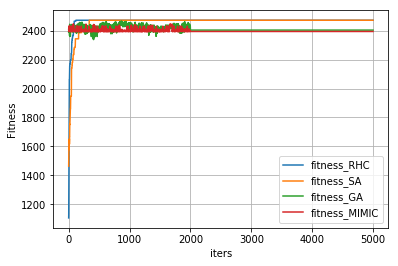

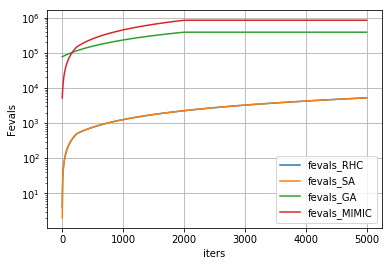

In [53]:
plot_fitness_eval(knp_25[:5000])

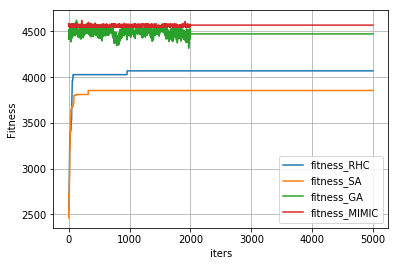

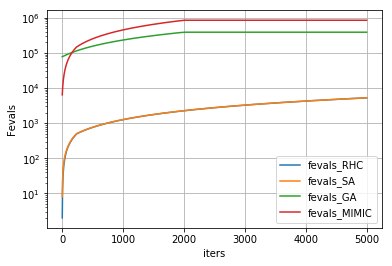

In [55]:
plot_fitness_eval(knp_50[:5000])

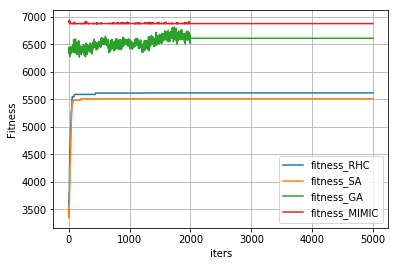

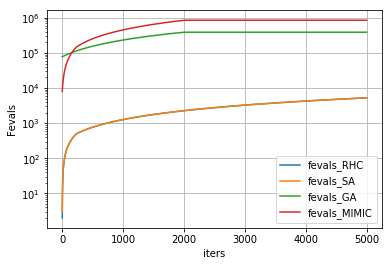

In [56]:
plot_fitness_eval(knp_75[:5000])

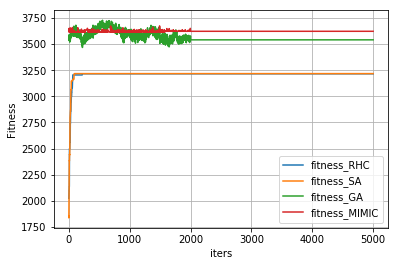

In [47]:
plot_fitness(df_knp[:5000])

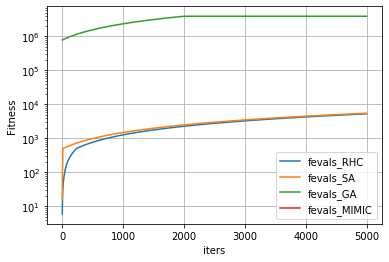

In [165]:
plot_evals(df_knp[:5000])

In [121]:
df_cp_rhc = pd.read_csv("ABAGAIL/jython/data/RHC-" + problem+".csv")
df_cp_rhc

,iters,fevals,fitness
0,0,2,5.0
1,1,4,5.0
2,2,6,5.0
3,3,8,5.0
4,4,10,5.0
...,...,...,...
19995,19995,20248,90.0
19996,19996,20249,90.0
19997,19997,20250,90.0
19998,19998,20251,90.0


In [16]:
def combine_charts(problem, option = ""):
    algos = ["RHC", "SA", "GA", "MIMIC"]
    
    file = problem + str(option)
    df_read = pd.read_csv("ABAGAIL/jython/data/" +problem+ "/"+ "RHC" +"-" + file+".csv")
    df= pd.DataFrame(index = df_read["iters"])
    
    for algo in algos:
        
        df_read = pd.read_csv("ABAGAIL/jython/data/"+problem+ "/" + algo +"-" + file+".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + algo)
        
        df = df.join(df_read)
    
    df.ffill(inplace= True)
    return df
    

In [87]:
df_read = pd.read_csv("ABAGAIL/jython/data/" + "RHC" +"-" + problem+".csv")
df_read = df_read.add_suffix("_" + "RHC")
df = df_read
df.set_index('iters'+"_RHC", inplace=True)
df.join(df2)

NameError: name 'df2' is not defined

In [88]:
df_read = pd.read_csv("ABAGAIL/jython/data/" + "RHC" +"-" + problem+".csv")

df= pd.DataFrame(index = df_read["iters"])
df

""
iters
0
1
2
3
4
...
19995
19996
19997


In [24]:
df_read = pd.read_csv("ABAGAIL/jython/data/" + "RHC" +"-" + problem+".csv", index_col = "iters")
df_read = df_read.add_suffix("_" + "RHC")
df_read2 = pd.read_csv("ABAGAIL/jython/data/" + "SA" +"-" + problem+".csv", index_col = "iters")
df_read2 = df_read.add_suffix("_" + "SA")
df_read = df_read.join(df_read2)
df_read

,fevals_RHC,fitness_RHC,fevals_RHC_SA,fitness_RHC_SA
iters,,,,
0,2,6.0,2,6.0
1,4,6.0,4,6.0
2,6,6.0,6,6.0
3,8,6.0,8,6.0
4,10,6.0,10,6.0
...,...,...,...,...
19995,20248,98.0,20248,98.0
19996,20249,98.0,20249,98.0
19997,20250,98.0,20250,98.0


In [20]:
df_read

,fevals_RHC,fitness_RHC
iters,,
0,2,6.0
1,4,6.0
2,6,6.0
3,8,6.0
4,10,6.0
...,...,...
19995,20248,98.0
19996,20249,98.0
19997,20250,98.0
